<a href="https://colab.research.google.com/github/aadumbuya/Linear_Regression/blob/main/summative/linear_regression/Walmart_Sales_Alhassan_A_Dumbuya_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt # A library for programmatic plot generation.
import pandas as pd # A library for data manipulation and analysis.
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression # LinearRegression from sklearn.


In [6]:
# load data
data = pd.read_csv("Walmart_Sales.csv")

In [7]:
# explore the data
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
# checking for missing values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
# get the statistical describe of the data
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [11]:
# Features and target variable
# Separate features and target variable
X = data.drop(columns=['Date', 'Weekly_Sales'])
y = data['Weekly_Sales']
print(X)
print(y)

      Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0         1             0        42.31       2.572  211.096358         8.106
1         1             1        38.51       2.548  211.242170         8.106
2         1             0        39.93       2.514  211.289143         8.106
3         1             0        46.63       2.561  211.319643         8.106
4         1             0        46.50       2.625  211.350143         8.106
...     ...           ...          ...         ...         ...           ...
6430     45             0        64.88       3.997  192.013558         8.684
6431     45             0        64.89       3.985  192.170412         8.667
6432     45             0        54.47       4.000  192.327265         8.667
6433     45             0        56.47       3.969  192.330854         8.667
6434     45             0        58.85       3.882  192.308899         8.667

[6435 rows x 6 columns]
0       1643690.90
1       1641957.44
2       16119

In [12]:
# prompt: Split the data for training

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [13]:
# training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [15]:
# prompt:  Compare predicted and actual values

import pandas as pd
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())


          Actual     Predicted
2436  1138800.32  1.189201e+06
3361  1304850.67  1.095370e+06
233   1769296.25  1.253766e+06
3667  1077640.13  1.095778e+06
5011   428851.99  7.434003e+05


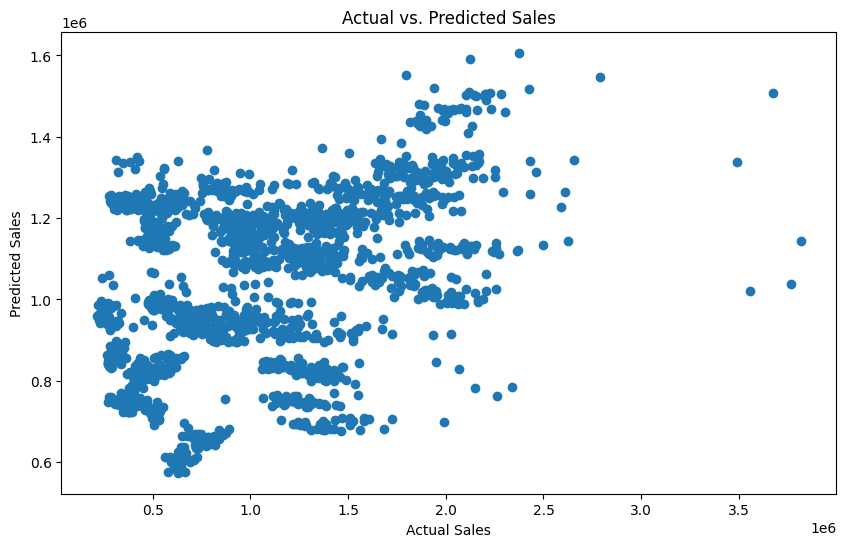

In [16]:
# prompt: plot predicted values

import matplotlib.pyplot as plt
# Plot predicted values against actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()


In [17]:
# prompt: evaluate the model and it accuracy in percentage

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

# Calculate accuracy as a percentage of the range of sales values
accuracy = (1 - (rmse / (y.max() - y.min()))) * 100
print('Accuracy: {:.2f}%'.format(accuracy))


Root Mean Squared Error: 521849.6106738074
R-squared: 0.14823448916332116
Accuracy: 85.54%


In [18]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']